**Brian Blaylock**  
**September 26, 2019**

# `make_RGB.py` Demo

I have gathered several RGB recipies from the [RAMMB CIRA](http://rammb.cira.colostate.edu/training/visit/quick_guides/) website, including:

- TrueColor
- FireTemperature
- AirMass
- DayCloudPhase
- DayConvection
- DayLandCloudFire
- WaterVapor
- DaySnowFog

These recipies are in the `make_RGB.py` file in this directory.

I downloaded ABI data for 1900 UTC on 19 September 2019 (Hurricane Humberto) for the  
[GOES-16](https://noaa-goes16.s3.amazonaws.com/ABI-L2-MCMIPC/2019/260/19/OR_ABI-L2-MCMIPC-M6_G16_s20192601901153_e20192601903532_c20192601904102.nc) and 
[GOES-17](https://noaa-goes17.s3.amazonaws.com/ABI-L2-MCMIPC/2019/260/19/OR_ABI-L2-MCMIPC-M6_G17_s20192601901196_e20192601903575_c20192601904095.nc) satellites for this demonstration (click links to download file from AWS).

For more details on how to generate these plots, see the example on the [Unidata gallery](http://unidata.github.io/python-gallery/examples/mapping_GOES16_TrueColor.html#sphx-glr-examples-mapping-goes16-truecolor-py).

In [1]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import metpy

from make_RGB import *

In [2]:
FILE16 = 'OR_ABI-L2-MCMIPC-M6_G16_s20192601901153_e20192601903532_c20192601904102.nc'
FILE17 = 'OR_ABI-L2-MCMIPC-M6_G17_s20192601901196_e20192601903575_c20192601904095.nc'

C16 = xarray.open_dataset(FILE16)
C17 = xarray.open_dataset(FILE17)

In [3]:
# Map-making housekeeping

# We'll use the `CMI_C01` variable as a 'hook' to get the CF metadata.
dat16 = C16.metpy.parse_cf('CMI_C01')
dat17 = C17.metpy.parse_cf('CMI_C01')

geos16 = dat16.metpy.cartopy_crs
geos17 = dat17.metpy.cartopy_crs

# We also need the x (north/south) and y (east/west) axis sweep of the ABI data
x16, y16 = (dat16.x, dat16.y)
x17, y17 = (dat17.x, dat17.y)

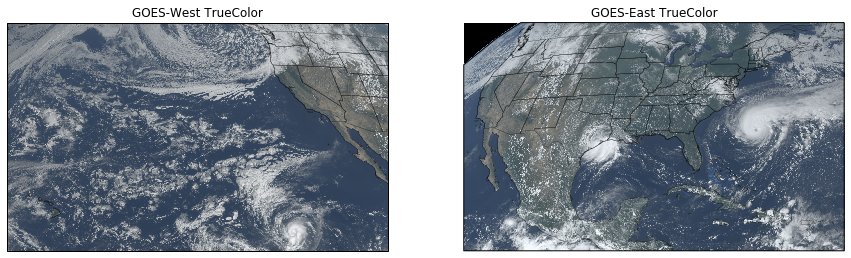

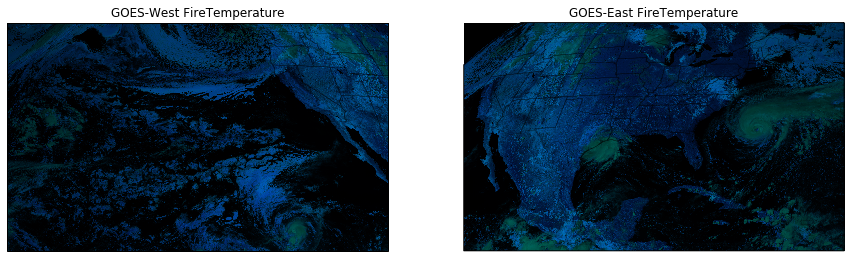

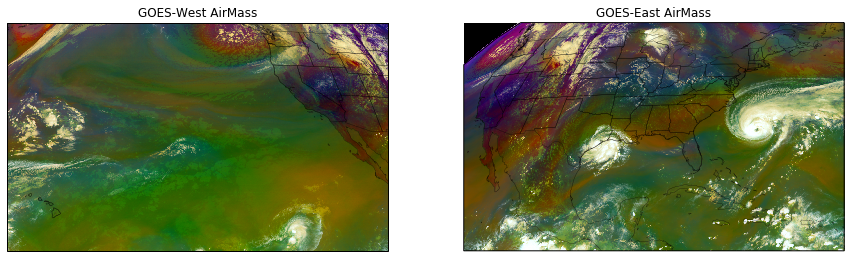

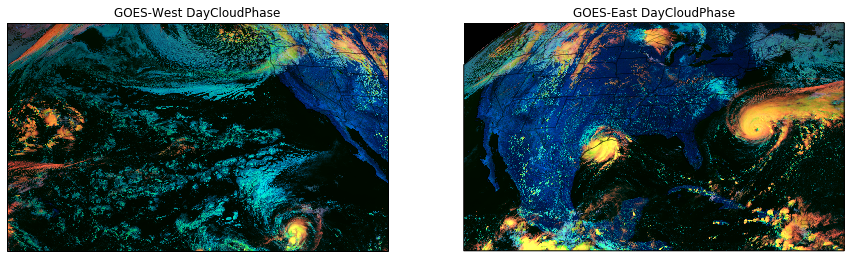

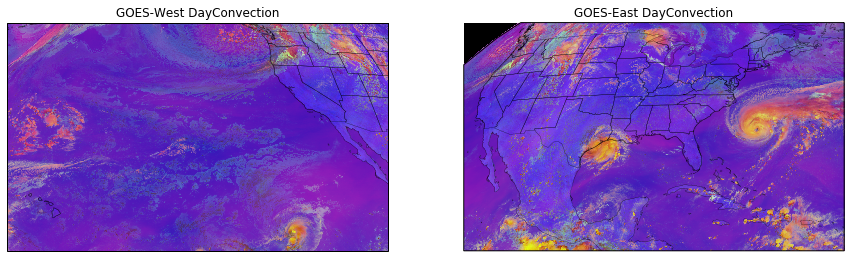

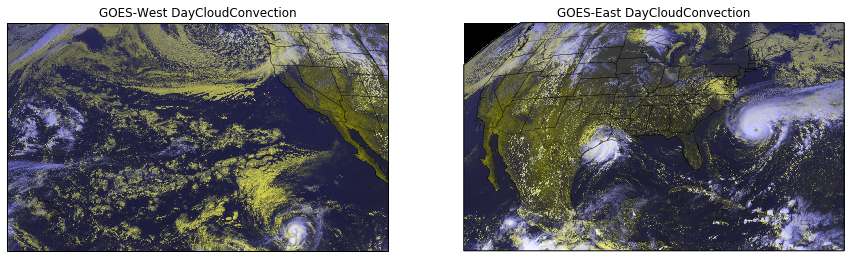

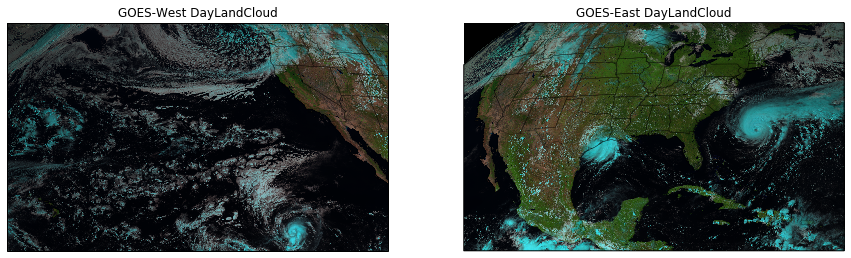

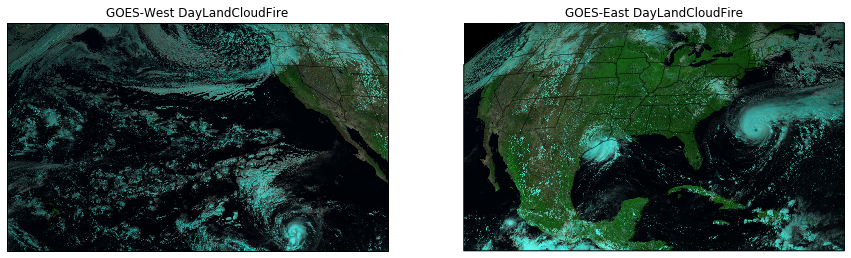

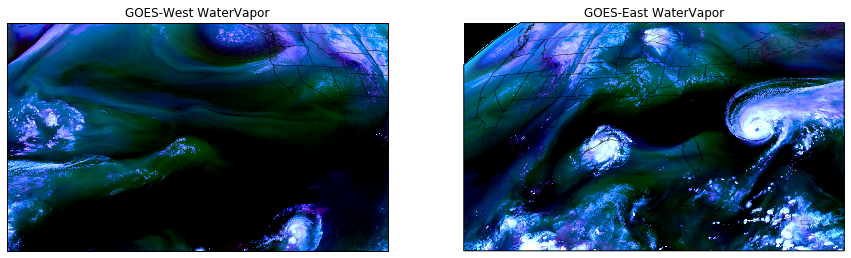

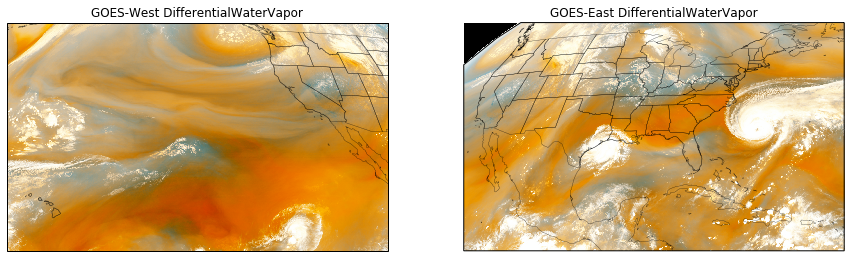

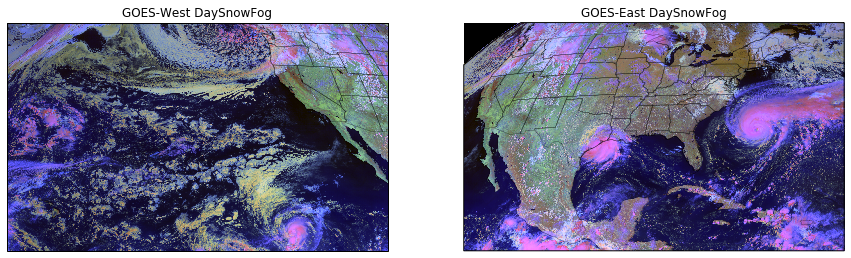

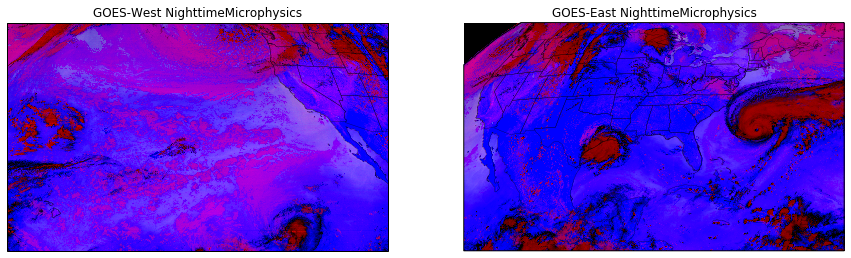

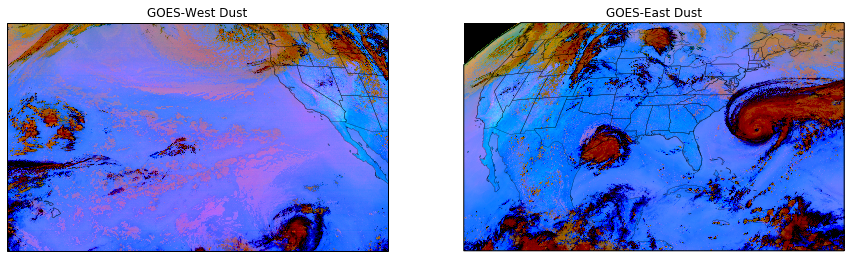

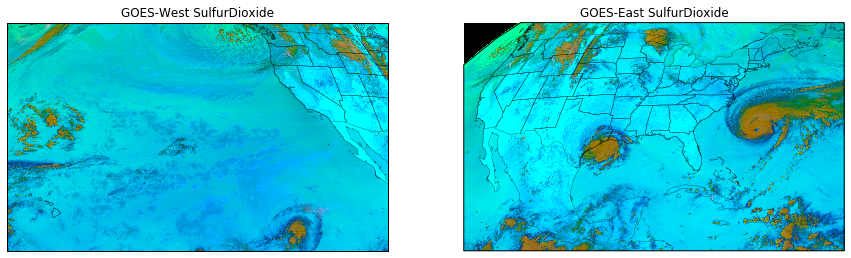

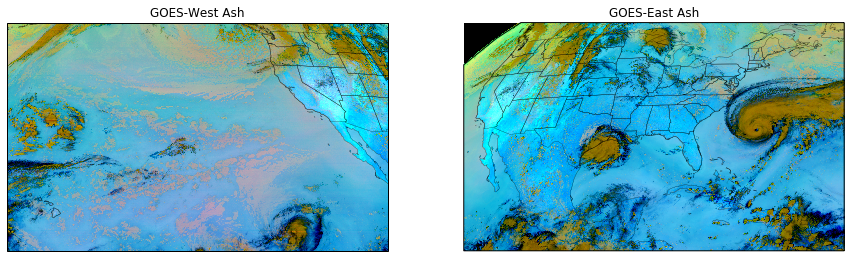

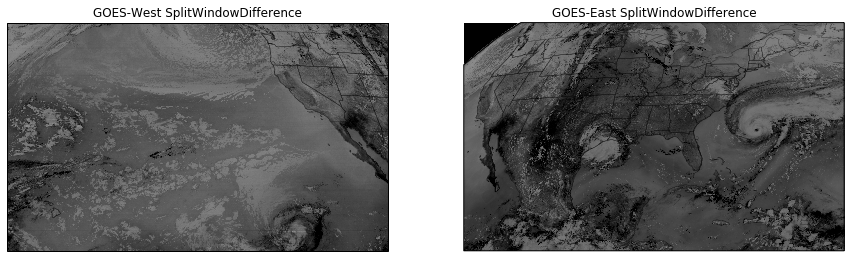

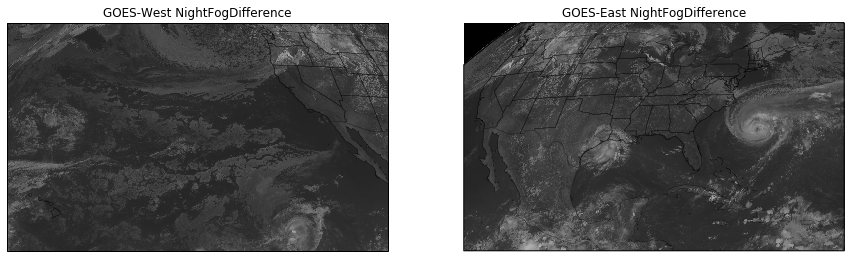

In [4]:
functions = [TrueColor, FireTemperature, AirMass, \
             DayCloudPhase, DayConvection, DayCloudConvection,\
             DayLandCloud, DayLandCloudFire, \
             WaterVapor, DifferentialWaterVapor, \
             DaySnowFog, NighttimeMicrophysics, \
             Dust, SulfurDioxide, Ash, \
             SplitWindowDifference, NightFogDifference]

for i, func in enumerate(functions):
    fig = plt.figure(figsize=(15, 12))

    # Create axis with Geostationary projection
    ax17 = fig.add_subplot(1, 2, 1, projection=geos17)
    ax16 = fig.add_subplot(1, 2, 2, projection=geos16)

    # GOES-West
    plt.sca(ax17)
    plt.title('GOES-West %s' % func.__name__)
    plt.imshow(func(C17), origin='upper',
               extent=(x17.min(), x17.max(), y17.min(), y17.max()), transform=geos17)
    # Add Coastlines and States
    plt.gca().coastlines(resolution='50m', color='black', linewidth=0.25)
    plt.gca().add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
    
    # GOES-East
    plt.sca(ax16)
    plt.title('GOES-East %s' % func.__name__)
    plt.imshow(func(C16), origin='upper',
               extent=(x16.min(), x16.max(), y16.min(), y16.max()), transform=geos16)
    # Add Coastlines and States
    plt.gca().coastlines(resolution='50m', color='black', linewidth=0.25)
    plt.gca().add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)